# TP5 - Filtre temporel : Résolution numérique

In [10]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from scipy.signal import square




In [13]:
E = 1
f = 1

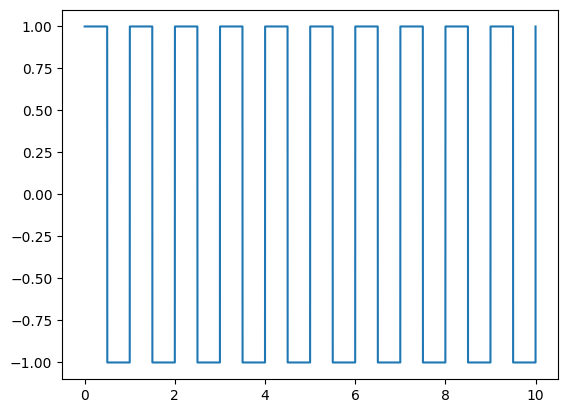

In [51]:
def creneau(t):
    return E * square(2*np.pi*f * t)


R = 1000
L = .075

t = np.linspace(0, 10, 100000)
plt.plot(t, creneau(t))
plt.show()

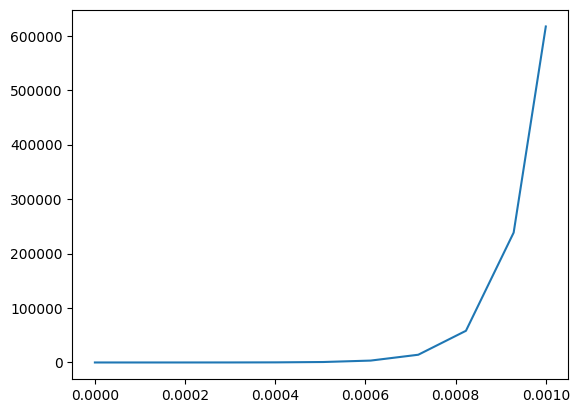

In [56]:
def resolution_scp(a, e, y0, t0, tf):
    """Renvoie la solution de l'équation y' + ay = e(t), y(0) = y_0 sur [t0, tf]"""
    equation = lambda t, y:  -a * y + e(t)
    
    return solve_ivp(equation, [t0, tf], [y0])


e = lambda t: (R/L)*creneau(t)

y = resolution_scp(-(R/L), e, 0, 0, 1e-3)
plt.plot(y.t, y.y[0], label="Solution avec scipy")
plt.show()

/var/folders/x_/pwxh11gn06l9_862qyf5_1_r0000gn/T/ipykernel_1991/2068645559.py:8: RuntimeWarning: overflow encountered in double_scalars
  y[i+1] = y[i] + h*(e(t[i]) - a*y[i])
/var/folders/x_/pwxh11gn06l9_862qyf5_1_r0000gn/T/ipykernel_1991/2068645559.py:13: RuntimeWarning: invalid value encountered in divide
  plt.plot(t, y/np.max(y), label="Solution avec la méthode d'Euler")


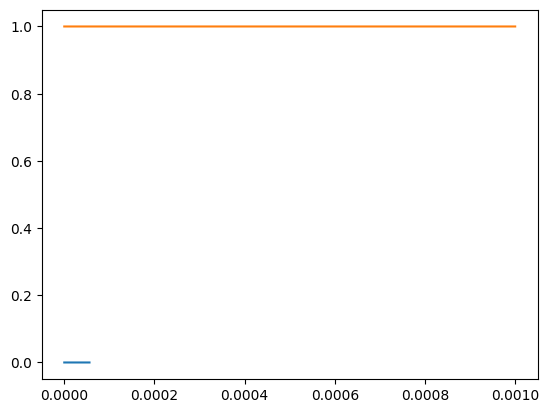

In [54]:
def methode_euler(a, e, y0, N):
    """Renvoie la solution de l'équation y' + ay = e(t), y(0) = y_0"""
    h = 1/N
    t = np.linspace(0, 0.001, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(N):
        y[i+1] = y[i] + h*(e(t[i]) - a*y[i])
    return t, y

t, y = methode_euler(-(R/L), lambda t: (R/L)*creneau(t), 0, 100000)

plt.plot(t, y/np.max(y), label="Solution avec la méthode d'Euler")
plt.plot(t, creneau(t))
plt.show()